In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
df = pd.read_csv(r'C:\Users\parha\Documents\Data_Analysis_projects\House\HousePricePrediction.xlsx - Sheet1.csv')

In [16]:
df.head(1)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0


In [17]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)

--------------------------- SHAPE ---------------------------
(2919, 13)
--------------------------- COLUMNS ---------------------------
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')
--------------------------- INDEX ---------------------------
RangeIndex(start=0, stop=2919, step=1)
--------------------------- VALUE TYPES ---------------------------
Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object
--------------------------- DUPLICATED VALUES ---------------------------
0
--------------------------- NUMBER OF UNIQUE VALUES ---------------------------

In [18]:
def grab_col_names(df):
    # Separate columns into categorical and numerical
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    print(f'cat_col: {len(categorical_cols)}')
    print(f'num_col: {len(numerical_cols)}')

    return categorical_cols, numerical_cols

In [19]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {categorical_cols}')
    print('-' * 80)
    print(f'Numerical : {numerical_cols}')


categorical_cols, numerical_cols = grab_col_names(df)
identify_check(df)

cat_col: 4
num_col: 9
--------------------------------------------------------------------------------
Categorical : Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
--------------------------------------------------------------------------------
Numerical : Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')


Exploratory Data Analysis\
EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

<Axes: >

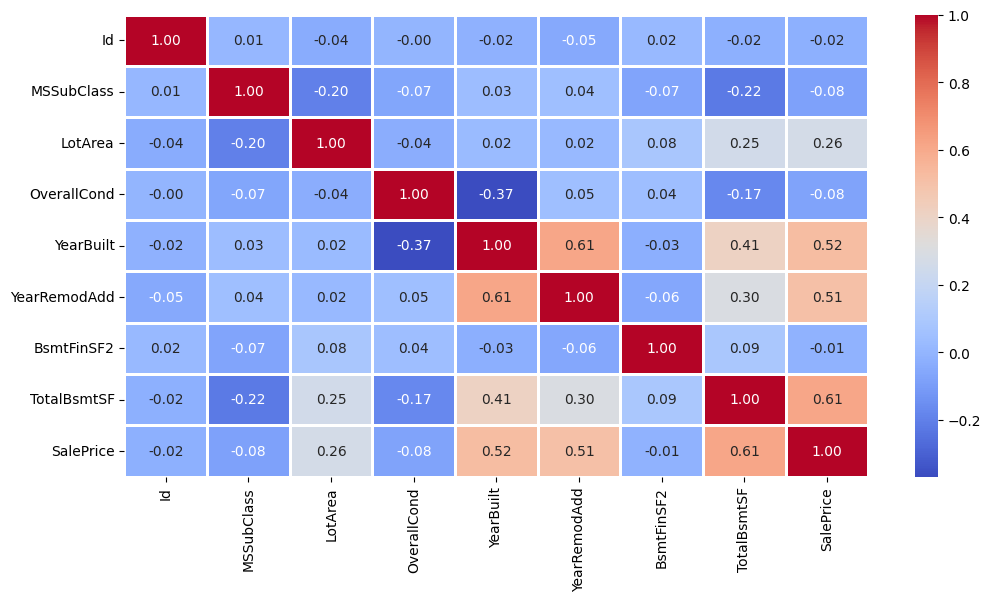

In [22]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(),
			cmap = 'coolwarm',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


To analyze the different categorical features. 

<Axes: title={'center': 'No. Unique values of Categorical Features'}, xlabel='None'>

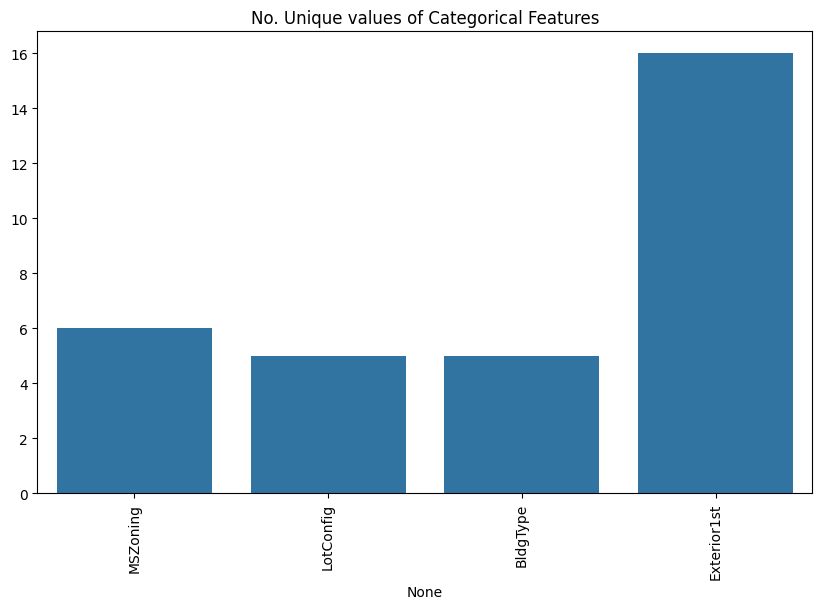

In [24]:
unique_values = []
for col in categorical_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=categorical_cols,y=unique_values)


To findout the actual count of each category we can plot the bargraph of each four features separately.

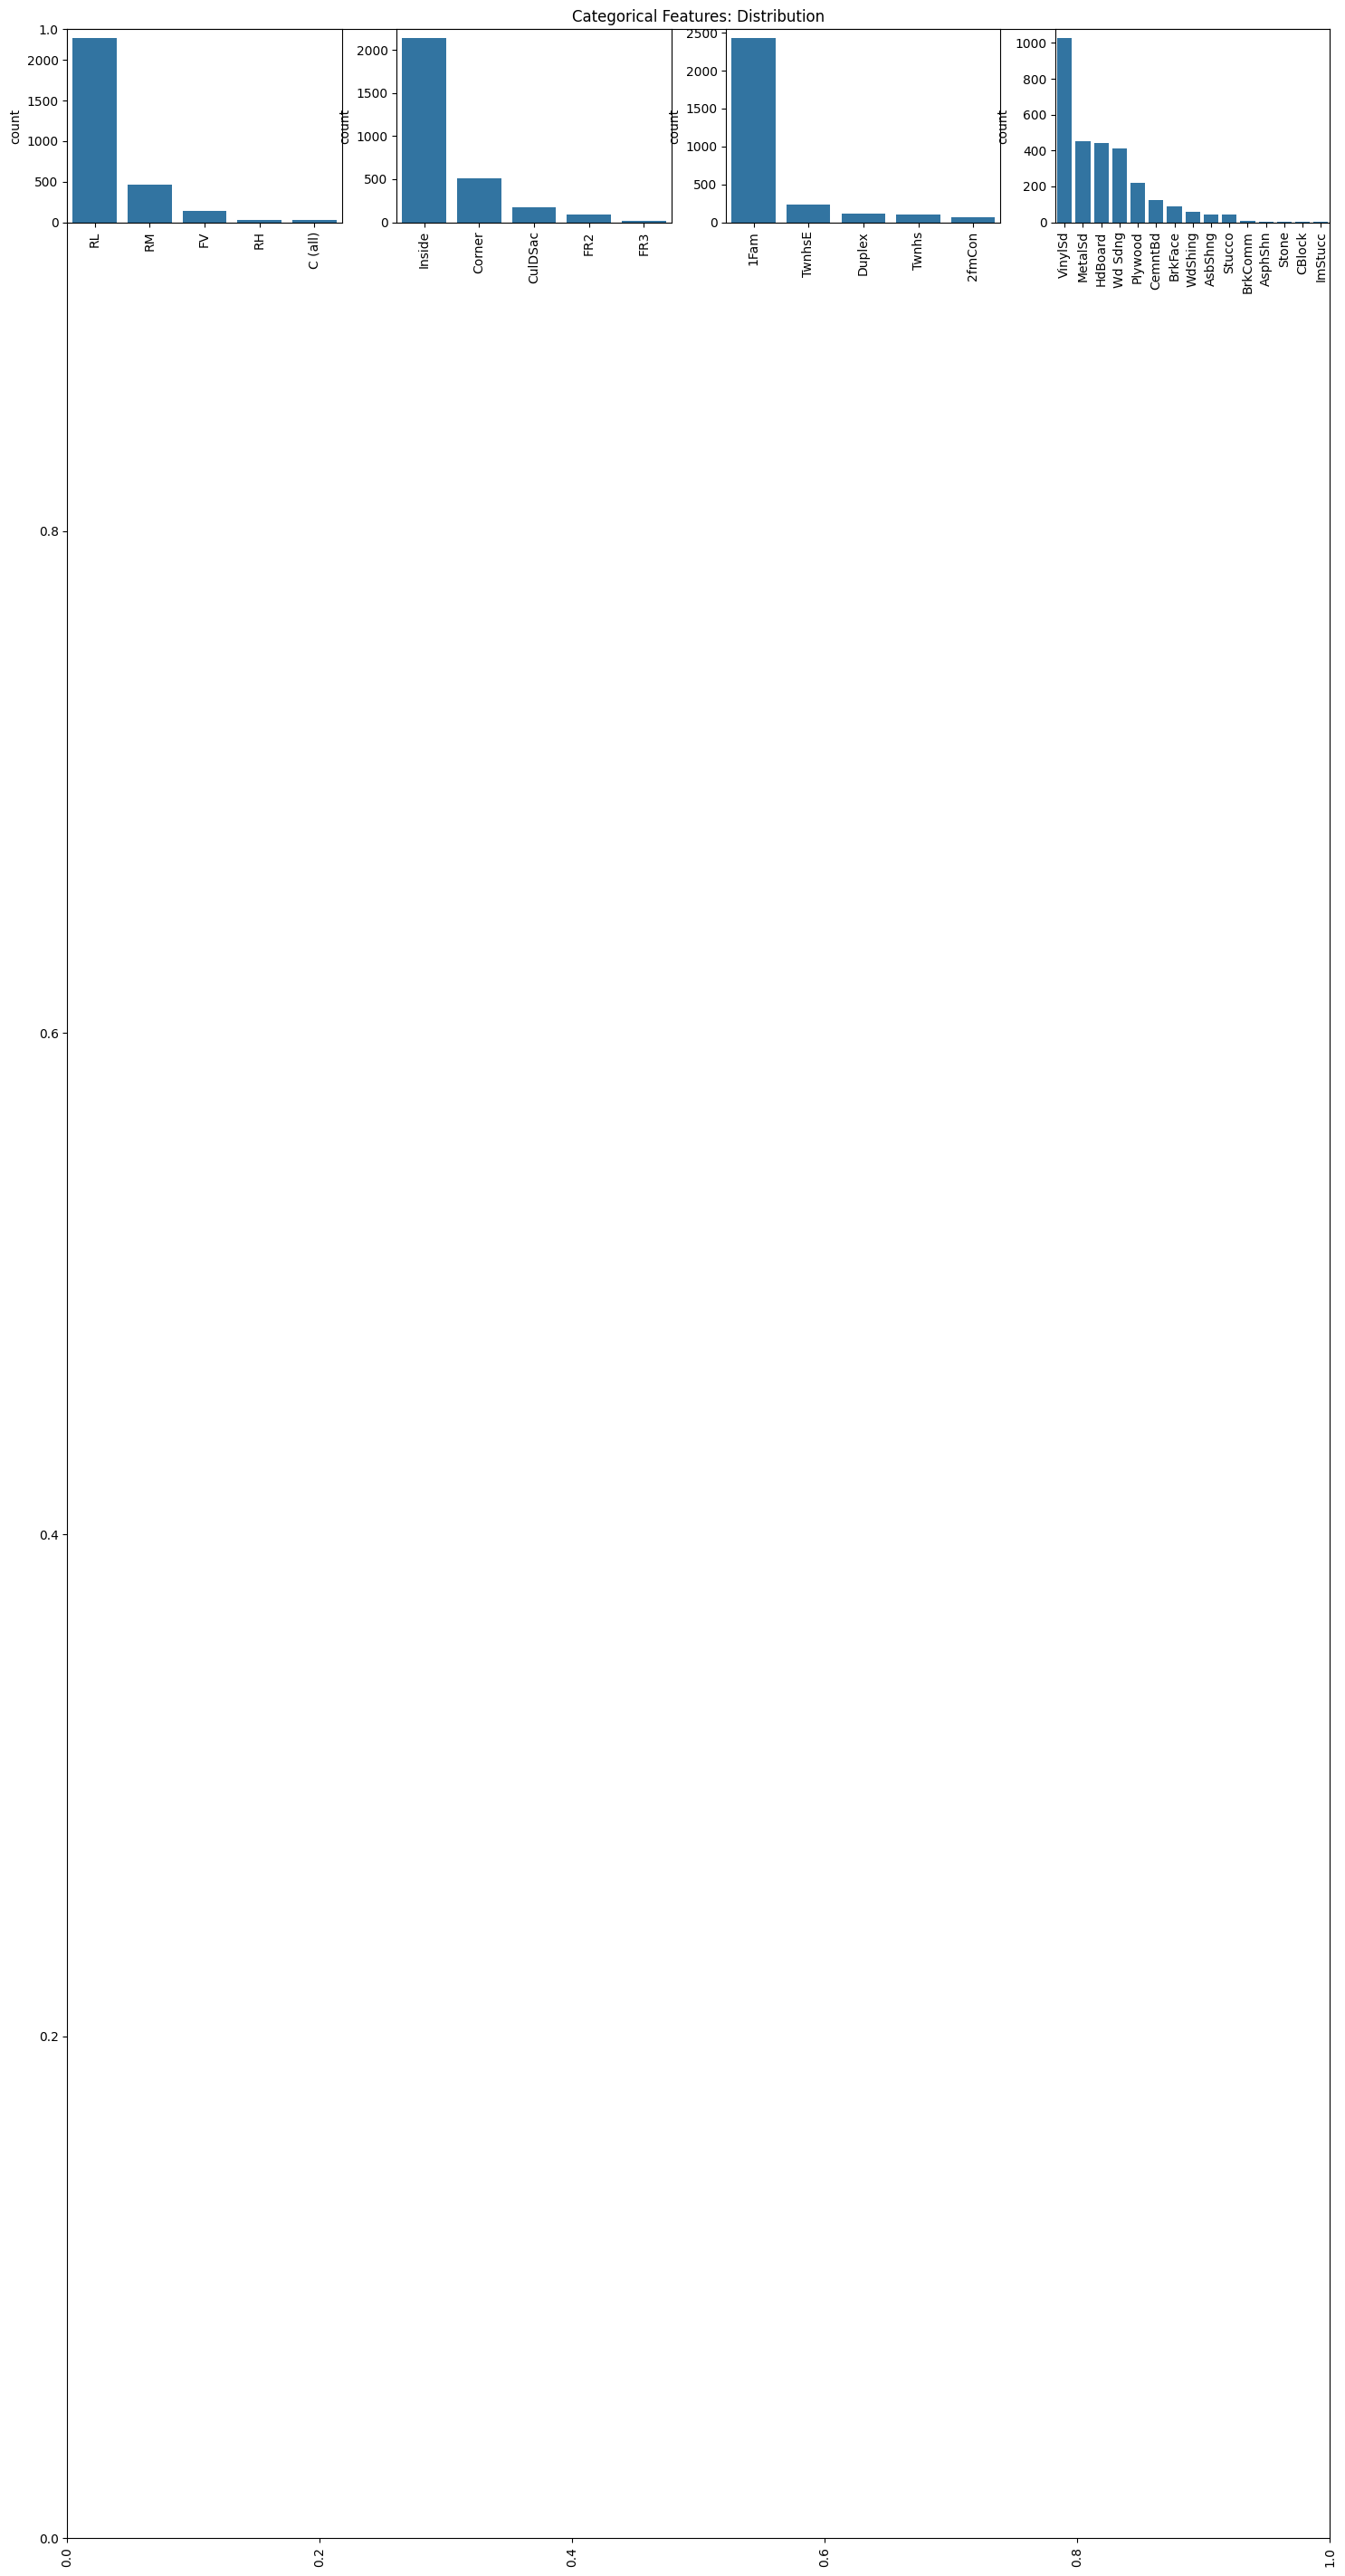

In [25]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in categorical_cols:
	y = df[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


Data Cleaning


In [26]:
df.drop(['Id'],
			axis=1,
			inplace=True)


Replacing SalePrice empty values with their mean values to make the data distribution symmetric.



In [27]:
df['SalePrice'] = df['SalePrice'].fillna(
df['SalePrice'].mean())


Drop records with null values (as the empty records arevery less).



In [28]:
new_dataset = df.dropna()

In [29]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

OneHotEncoder – For Label categorical features\
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [30]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.



In [32]:
# Initialize OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse

# Fit and transform the data
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

# Set the index and column names to match the original DataFrame
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

# Drop the original object columns from the dataset
df_final = new_dataset.drop(object_cols, axis=1)

# Concatenate the original DataFrame with the one-hot encoded columns
df_final = pd.concat([df_final, OH_cols], axis=1)

print(df_final.head())  # Display the first few rows of the final DataFrame

   MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0          60     8450            5       2003          2003         0.0   
1          20     9600            8       1976          1976         0.0   
2          60    11250            5       2001          2002         0.0   
3          70     9550            5       1915          1970         0.0   
4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0        856.0   208500.0               0.0          0.0          0.0   
1       1262.0   181500.0               0.0          0.0          0.0   
2        920.0   223500.0               0.0          0.0          0.0   
3        756.0   140000.0               0.0          0.0          0.0   
4       1145.0   250000.0               0.0          0.0          0.0   

   MSZoning_RL  MSZoning_RM  LotConfig_Corner  LotConfig_CulDSac  \
0          1.0          0.0         

Splitting Dataset into Training and Testing\
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)


Model and Accuracy

As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine\
Random Forest Regressor\
Linear Regressor

SVM – Support vector Machine\
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.

In [34]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


Random Forest Regression\
Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks. 

In [35]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.1876600427539357

Linear Regression\
Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc. 

In [36]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.187416838415999


CatBoost Classifier\
CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library

In [41]:
# This code is contributed by @amartajisce
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score


Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 3.52ms	remaining: 3.52s
1:	learn: 55780.1567575	total: 5.74ms	remaining: 2.86s
2:	learn: 55060.9599505	total: 8.15ms	remaining: 2.71s
3:	learn: 54456.1126921	total: 10.6ms	remaining: 2.64s
4:	learn: 53901.1464265	total: 12.9ms	remaining: 2.57s
5:	learn: 53334.6062357	total: 15.2ms	remaining: 2.51s
6:	learn: 52824.4943646	total: 17.5ms	remaining: 2.48s
7:	learn: 52381.4267520	total: 19.4ms	remaining: 2.41s
8:	learn: 51841.0364316	total: 21.4ms	remaining: 2.36s
9:	learn: 51281.5852560	total: 23.6ms	remaining: 2.34s
10:	learn: 50825.3817438	total: 25.7ms	remaining: 2.31s
11:	learn: 50477.2609796	total: 27.6ms	remaining: 2.27s
12:	learn: 50081.4097641	total: 29.6ms	remaining: 2.25s
13:	learn: 49663.6380360	total: 31.7ms	remaining: 2.23s
14:	learn: 49334.5782662	total: 33.8ms	remaining: 2.22s
15:	learn: 48967.5221026	total: 36ms	remaining: 2.21s
16:	learn: 48676.4063222	total: 38ms	remaining: 2.2s
17:	learn: 48359.1169955	total: 4

0.38351169878113034

Conclusion\
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.